# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
import pprint
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = "Metric"
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather['coord']['lat'])
        #break
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | saint-pierre
Processing Record 5 of Set 1 | chaman
Processing Record 6 of Set 1 | sai buri
Processing Record 7 of Set 1 | tari
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | al kharijah
Processing Record 11 of Set 1 | cable beach
City not found. Skipping...
Processing Record 12 of Set 1 | polyarnyy
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | priargunsk
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | buloh kasap
Processing Record 17 of Set 1 | cozumel
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | sidi khaled
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | misratah
Processin

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,portland,45.5234,-122.6762,27.28,39,75,4.63,US,1690425554
1,albany,42.6001,-73.9662,24.36,82,100,2.15,US,1690425418
2,whitehorse,60.7161,-135.0538,20.73,62,100,6.71,CA,1690425676
3,saint-pierre,-21.3393,55.4781,18.82,82,100,2.57,RE,1690425676
4,chaman,30.9236,66.4512,28.22,51,6,2.43,PK,1690425676


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,27.28,39,75,4.63,US,1690425554
1,albany,42.6001,-73.9662,24.36,82,100,2.15,US,1690425418
2,whitehorse,60.7161,-135.0538,20.73,62,100,6.71,CA,1690425676
3,saint-pierre,-21.3393,55.4781,18.82,82,100,2.57,RE,1690425676
4,chaman,30.9236,66.4512,28.22,51,6,2.43,PK,1690425676


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

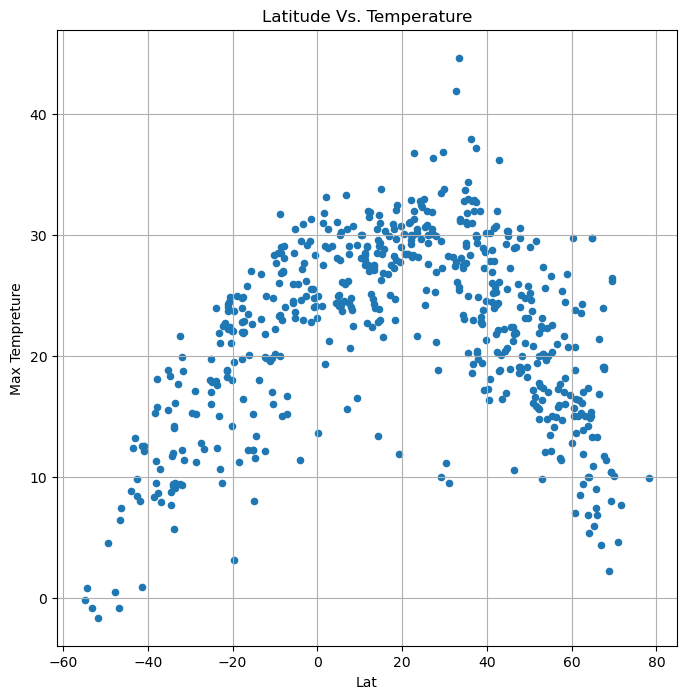

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter",
                  x="Lat",
                  y="Max Temp",
                  grid=True,
                  figsize=(8,8),
                  title="latitude vs. temperature")

# Incorporate the other graph properties
plt.xlabel = ('Latitude')
plt.ylabel('Max Tempreture')
plt.title('Latitude Vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

#### Latitude Vs. Humidity

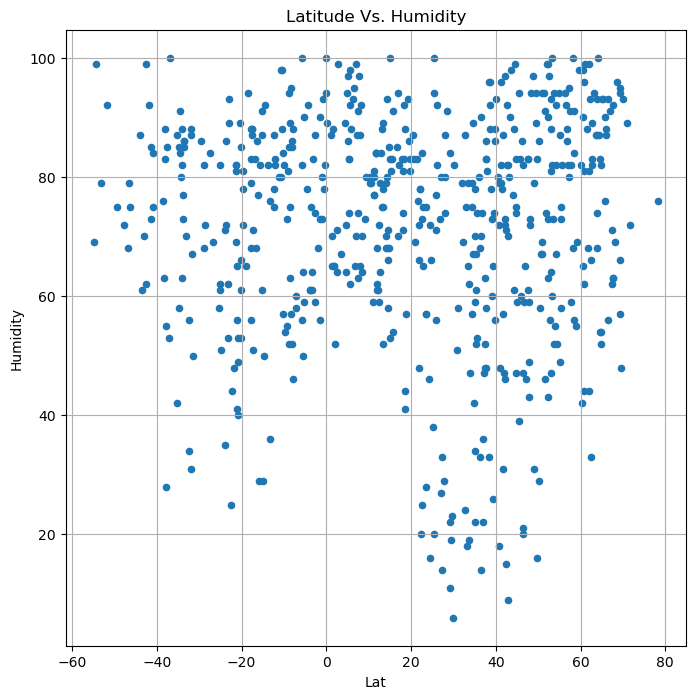

In [12]:
# Build scatter plot for latitude vs. Humidity
city_data_df.plot(kind="scatter",
                  x="Lat",
                  y="Humidity",
                  grid=True,
                  figsize=(8,8),
                  title="latitude vs. temperature")

# Incorporate the other graph properties
plt.xlabel = ('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

#### Latitude Vs. Cloudiness

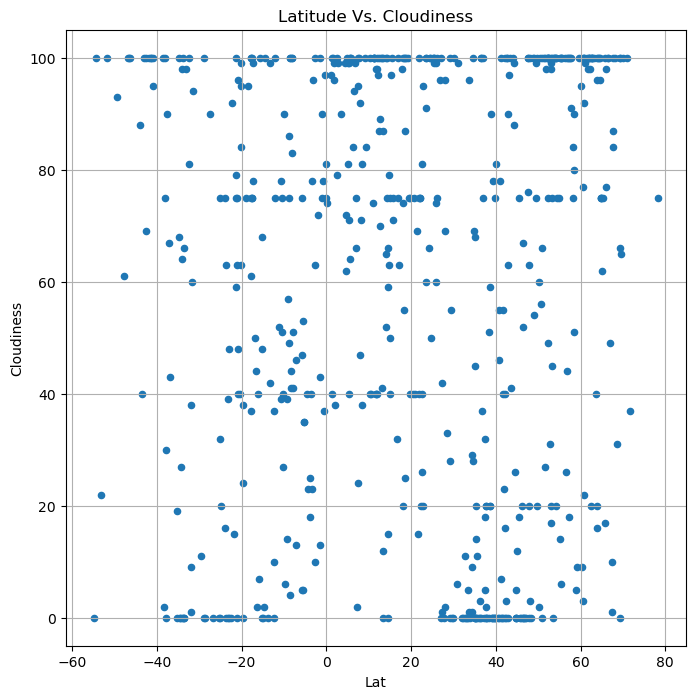

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter",
                  x="Lat",
                  y="Cloudiness",
                  grid=True,
                  figsize=(8,8),
                  title="latitude vs. Cloudiness")

# Incorporate the other graph properties
plt.xlabel = ('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

#### Latitude vs. Wind Speed Plot

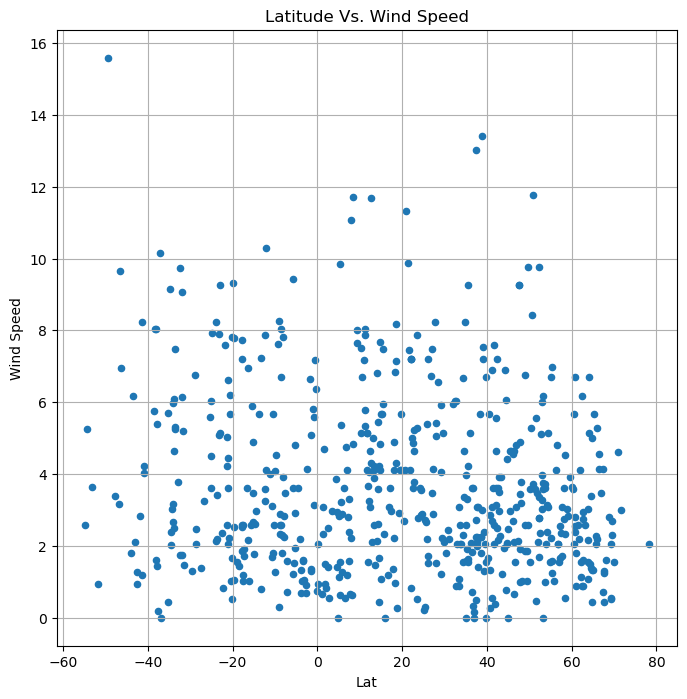

In [14]:
# Build the scatter plots for latitude vs. Wind Speed
city_data_df.plot(kind="scatter",
                  x="Lat",
                  y="Wind Speed",
                  grid=True,
                  figsize=(8,8),
                  title="Latitude vs. Wind Speed")

# Incorporate the other graph properties
plt.xlabel = ('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def line_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    xmin = x_values.min()
    ymin = y_values()
    plt.annotate(line,(xmin, ymin),fontsize=15,color='blue')
    print(f'The r-value is: {rvalue}')   

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,portland,45.5234,-122.6762,27.28,39,75,4.63,US,1690425554
1,albany,42.6001,-73.9662,24.36,82,100,2.15,US,1690425418
2,whitehorse,60.7161,-135.0538,20.73,62,100,6.71,CA,1690425676
4,chaman,30.9236,66.4512,28.22,51,6,2.43,PK,1690425676
5,sai buri,6.7013,101.6168,33.31,65,99,4.74,TH,1690425677


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,saint-pierre,-21.3393,55.4781,18.82,82,100,2.57,RE,1690425676
7,port-aux-francais,-49.3500,70.2167,4.52,75,93,15.59,TF,1690425677
15,adamstown,-25.0660,-130.1015,19.72,61,32,6.03,PN,1690425678
19,touros,-5.1989,-35.4608,23.62,90,35,4.81,BR,1690425679
22,edinburgh of the seven seas,-37.0676,-12.3116,10.64,53,67,10.16,SH,1690425679


###  Temperature vs. Latitude Linear Regression Plot

TypeError: 'Series' object is not callable

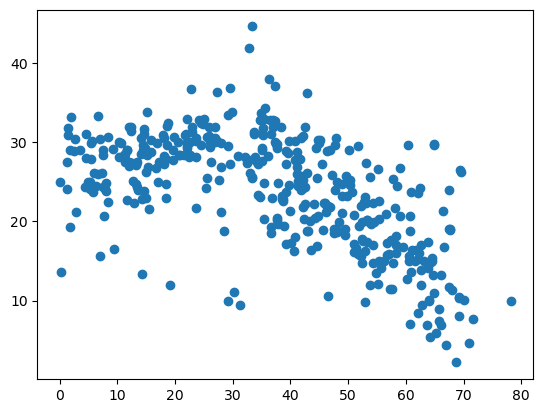

In [29]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

North_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.plot(northern_hemi_df['Lat'], North_regress, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Tempreture')
plt.title('Latitude Vs. Tempreture')

plt.show()

TypeError: 'Series' object is not callable

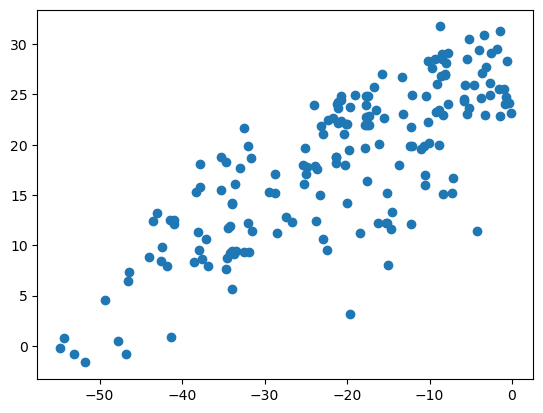

In [21]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

North_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.plot(southern_hemi_df['Lat'], southern_hemi_df, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Tempreture')
plt.title('Latitude Vs. Tempreture')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

TypeError: 'Series' object is not callable

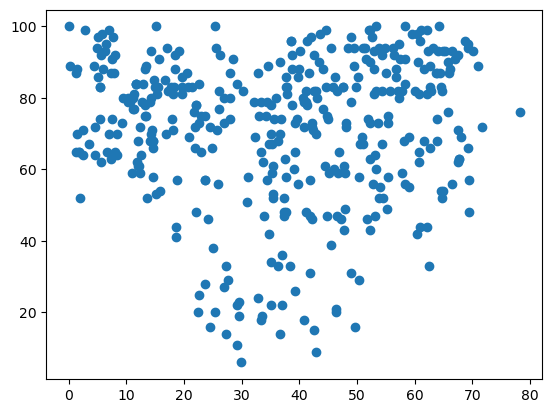

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

North_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.plot(northern_hemi_df['Lat'], North_regress, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')

plt.show()

TypeError: 'Series' object is not callable

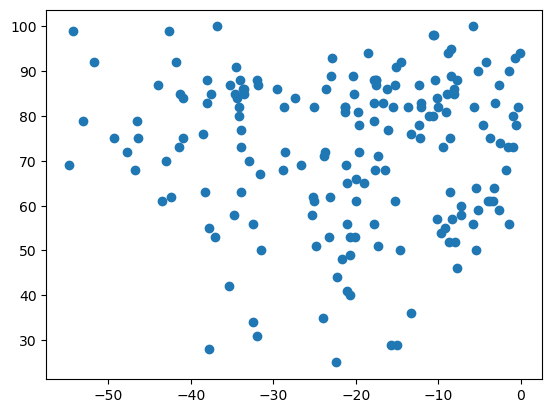

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

North_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.plot(southern_hemi_df['Lat'], southern_hemi_df, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

TypeError: 'Series' object is not callable

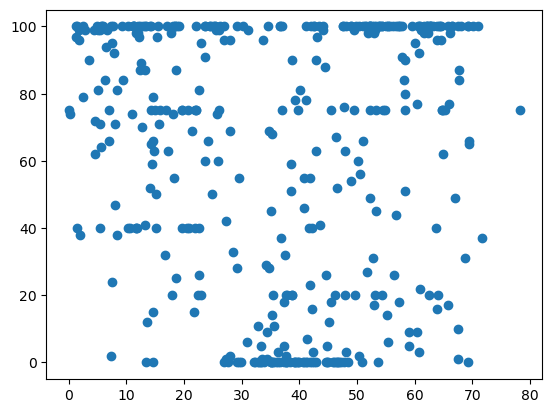

In [31]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

North_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.plot(northern_hemi_df['Lat'], North_regress, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness')

plt.show()

The r-value is: 0.02056735429994368


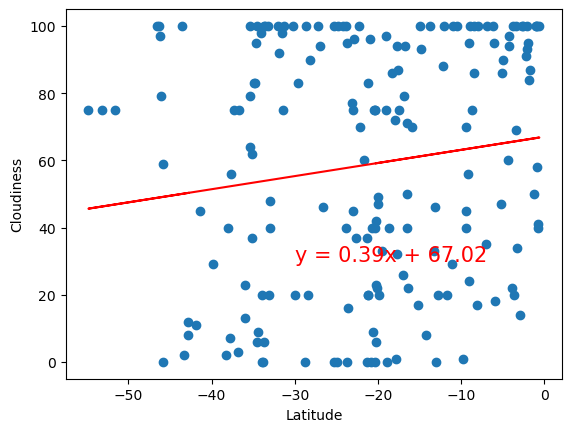

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

North_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.plot(southern_hemi_df['Lat'], southern_hemi_df, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

TypeError: 'Series' object is not callable

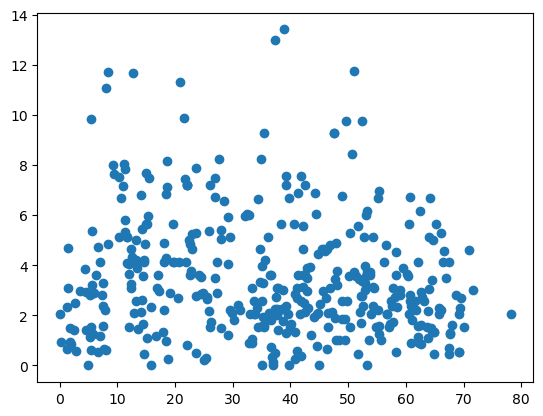

In [30]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed '])

North_regress = line_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed '])

plt.plot(northern_hemi_df['Lat'], North_regress, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')

plt.show()

The r-value is: 0.062239040700515696


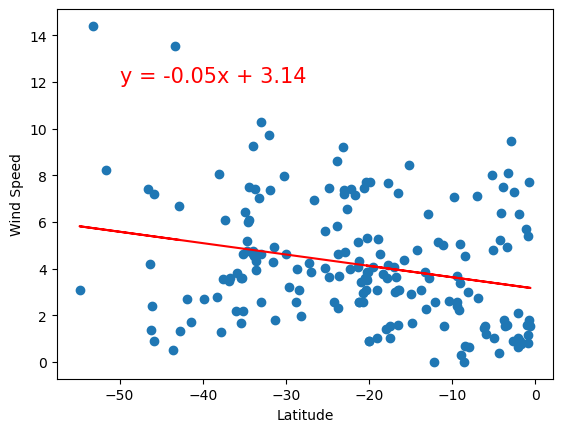

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed '])

North_regress = line_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed '])

plt.plot(southern_hemi_df['Lat'], southern_hemi_df, 'r-')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs. Humidity')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE